# Combine the CSVs into 1

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Dot swapping

Get the average of the duplicates, and parse them by column followed by row

Dot swapping to bring the dots back to their original position (8*18, max size 144)
* For panel 1:
    * K15/16 to C1/2 (BB w/o urea) - 136 to 2
    * M15/16 to K1/2 (IgE 62.5) - 138 to 10
    * O15/16 to I5/6 (Chicken breast) - 140 to 44
    * L15/16 to D1/2 (PBS) - 137 to 3
    * N15/16 to L1/2 (IgE 31.25) - 139 to 11
    * P15/16 to J5/6 (Cooked soy) - 141 to 45
    * Delete last 8 elements (136 onwards)

* For panel 2: (a bit more complicated)
    * Swap I3/4 with K3/4 (BSF PKM WT with BB w urea gel) (28 with 26)
    * Swap H3/4 with L3/4 (BSF M<P WT with BB w/o urea gel) (25 with 29)
    * Just delete the empty dots
    * A5/6, E5/6, G5/6, I5/6, K5/6 (36, 40, 42, 44, 46)
    * B5/6, F5/6, H5/6, J5/6, L5/6 (37, 41, 43, 45, 47)
    * Rearrange as I see fit later on

In [10]:
# Set directory of batch
batch_directory = "150322"
# List of dataframes of values
batch1 = []
batch2 = []
# Record panel
panels = []
# Record ID
id1 = []
id2 = []

print(f"Number of membranes: {len(os.listdir(batch_directory))}")

for file in os.listdir(batch_directory):
    # Get panel number and id
    panel, idx = file.split("-")
    idx = idx[:len(idx)-4]
    panels.append(panel)

    # Use only the first 2 columns with usecols
    csv = pd.read_csv(batch_directory + '/' + file, 
                      usecols=[0,1], 
                      names=['Spot', 'Value'],
                      encoding='unicode_escape') # Must be the full file path
    # Remove top 9 rows as they are irrelevant
    csv = csv.dropna().iloc[4:,].reset_index(drop=True)
    # Split Spot into Row and Column
    csv['Row'] = csv['Spot'].str[4]
    csv['Col'] = csv['Spot'].str[5:]
    # Handle value error if values are in scientific notation
    try:
        csv['Value'].astype(int)
    except ValueError:
        print(f'Notation error: File {file} needs to be converted to int!')
        continue

    # Convert them into list of values
    # We process them column by column, and average the duplicates
    l = []
    for col in range(1, 9): # We use 2*i - 1 and 2*i
        for row in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R']:
            spot1 = "Spot" + row + str(2*col - 1)
            spot2 = "Spot" + row + str(2*col)
            dot1 = int(csv.loc[csv['Spot'] == spot1, 'Value'].iloc[0])
            dot2 = int(csv.loc[csv['Spot'] == spot2, 'Value'].iloc[0])
            dot = (dot1 + dot2) / 2
            l.append(dot)

    # Swap the dots back to their original position
    # Swap panel 1
    if panel == "1":
        # l[2] = l[136] # Leave in for 150222 batch
        # l[10] = l[138]
        # l[44] = l[140] # Leave in for 150222 batch
        # l[3] = l[137] # Leave in for 150222 batch
        # l[11] = l[139]
        if idx != "499":
            l[45] = l[141] # Leave in for all
        del l[136:]

        batch1.append(l)
        id1.append(idx)
        
    # Delete panel 2 empty. No change across all batches
    if panel == "2":
        # print(l[28], l[26], l[25], l[29])
        # Swap
        l[28], l[26] = l[26], l[28]
        l[25], l[29] = l[29], l[25]
        # print(l[28], l[26], l[25], l[29])
        # Delete 36 and 37
        del l[36:38]
        # Delete 40 to 49
        del l[38:46]

        batch2.append(l)
        id2.append(idx)

Number of membranes: 72


In [13]:
panel1["ID"].unique()

array(['461', '474', '519', '520', '523', '528', '539', '545', '555',
       '573', '578', '580', '581', '589', '668', '675', '676', '682',
       '683', '688', '690', '694', '701', '703', '705', '706', '710',
       '711', '712', '713', '721', '725', '732', '733', '737', 'B'],
      dtype=object)

## Account for edge, and then swap



In [3]:
# Set directory of batch
batch_directory = "090322"
# List of dataframes of values
batch1 = []
batch2 = []
# Record panel
panels = []
# Record ID
id1 = []
id2 = []

print(f"Number of membranes: {len(os.listdir(batch_directory))}")

for file in os.listdir(batch_directory):
    # Get panel number and id
    panel, idx = file.split("-")
    idx = idx[:len(idx)-4]
    panels.append(panel)

    # Use only the first 2 columns with usecols
    csv = pd.read_csv(batch_directory + '/' + file, 
                      usecols=[0,1], 
                      names=['Spot', 'Value'],
                      encoding='unicode_escape') # Must be the full file path
    
    # Remove top 9 rows as they are irrelevant
    csv = csv.dropna().iloc[4:,].reset_index(drop=True)
    # Split Spot into Row and Column
    csv['Row'] = csv['Spot'].str[4]
    csv['Col'] = csv['Spot'].str[5:]
    # Handle value error if values are in scientific notation
    try:
        csv['Value'].astype(int)
    except ValueError:
        print(f'Notation error: File {file} needs to be converted to int!')
        continue

    # Convert them into list of values
    # We process them column by column, and average the duplicates
    l = []
    for col in range(1, 9): # We use 2*i - 1 and 2*i
        for row in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R']:
            spot1 = "Spot" + row + str(2*col - 1)
            spot2 = "Spot" + row + str(2*col)
            dot1 = int(csv.loc[csv['Spot'] == spot1, 'Value'].iloc[0])
            dot2 = int(csv.loc[csv['Spot'] == spot2, 'Value'].iloc[0])
            dot = (dot1 + dot2) / 2
            l.append(dot)
            
    # Add to respective batch
    if panel == "1":
        batch1.append(l)
        id1.append(idx)
    if panel == "2":
        batch2.append(l)
        id2.append(idx)

Number of membranes: 60


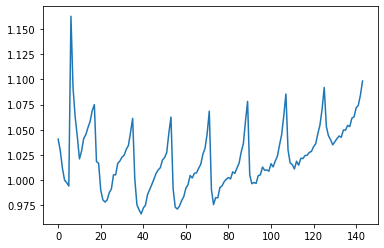

In [4]:
edge1 = pd.DataFrame.from_records(batch1)
edge2 = pd.DataFrame.from_records(batch2)

# Combine and account for edge effect
edge1.insert(0, "Batch", batch_directory)
edge1.insert(0, "Panel", 1)
edge1.insert(0, "ID", id1)
edge2.insert(0, "Batch", batch_directory)
edge2.insert(0, "Panel", 2)
edge2.insert(0, "ID", id2)

# Edge part
edge1_df = edge1[edge1["ID"] == "B"].iloc[:,3:]
edge2_df = edge2[edge2["ID"] == "B"].iloc[:,3:]

# Scale down or up to PBS value in blank OR empty cell (if is pre-swap)
# Record the scaling factors in a list
factors1 = []
factors2 = []
pbs1 = edge1_df.iloc[:,3]
pbs2 = edge2_df.iloc[:,3]

# Iterate through each column (PBS is the 4th element)
for column in edge1_df:
    factor1 = edge1_df[column] / pbs1
    factors1.append(factor1)
for column in edge2_df:
    factor2 = edge2_df[column] / pbs2
    factors2.append(factor2)

plt.plot(factors1)

In [5]:
def edge_factors(edge_df, avg_pbs):
    # Ignore first 18
    avg_factors = [[] for i in range(18)]
    factors = []

    # Start at 18
    i = 18
    end = edge_df.shape[1]
    edge = edge_df.values.tolist()[0]

    for row in range(8):
        # Ignore second row
        if row == 1:
            continue
        for col in range(18):
            # Break condition
            if i > end-1:
                break
            factor = edge[i] / avg_pbs
            factors.append(factor)
            avg_factors[col].append(factor)
            i += 1

    # Convert each sublist into average
    for i in range(len(avg_factors)):
        avg_factors[i] = sum(avg_factors[i]) / len(avg_factors[i])
        
    return avg_factors

In [6]:
# First 18 elements take the average, the rest follow their own values
avgfactors1 = edge_factors(edge1_df, pbs1)
avgfactors2 = edge_factors(edge2_df, pbs2)

factors1[:18] = avgfactors1
factors2[:18] = avgfactors2

factored1_df = edge1.copy(deep=True)
factored2_df = edge2.copy(deep=True)

# Strong overfit version
# for i in range(factored1_df.shape[1] - 3):
#     factored1_df.iloc[:,i+3] /= float(factors1[i])
# for i in range(factored2_df.shape[1] - 3):
#     factored2_df.iloc[:,i+3] /= float(factors2[i])
    
# Averaged out version
for i in range(factored1_df.shape[1] - 3):
    factored1_df.iloc[:,i+3] /= float(avgfactors1[i%18])
for i in range(factored2_df.shape[1] - 3):
    factored2_df.iloc[:,i+3] /= float(avgfactors2[i%18])
    
factored1_df.head()

,ID,Panel,Batch,0,1,2,3,4,5,6,...,134,135,136,137,138,139,140,141,142,143
0,1,1,150222-excel,272499.517000,263194.138316,254180.417497,251247.286388,244990.295552,240620.787749,303607.150132,...,262404.121402,258768.663852,258364.634819,259183.502581,258498.579952,254990.555017,255864.998466,256919.150458,254735.427735,255544.258664
1,10,1,150222-excel,425014.219388,428333.038334,422962.399535,418649.573453,418114.238529,416158.171905,487888.958071,...,421400.732074,422545.437164,424119.136424,425533.694612,425440.984290,422643.990095,421948.321312,421916.463811,419663.031792,438349.254637
2,120,1,150222-excel,373341.379259,374897.554368,370260.823304,366036.648685,363578.622838,360966.961257,444476.462179,...,362076.805794,364387.257687,365948.433283,368676.938984,373119.962881,366664.228690,366928.417172,367363.857165,364683.388412,365266.772828
3,122,1,150222-excel,396454.304865,392792.065245,389696.890541,387961.178048,388444.353766,387946.806595,483539.010575,...,403141.142420,400152.573996,398516.768272,399333.041648,401809.711717,398843.646559,401627.026632,409092.311994,402380.371409,402807.059654
4,127,1,150222-excel,248148.998389,232840.683011,229340.168116,232261.849224,231110.570906,228362.134847,331995.627181,...,240323.835988,239722.615105,240768.493707,244859.472079,253581.132016,242123.940932,247456.735531,248947.367457,249128.072302,253430.214416


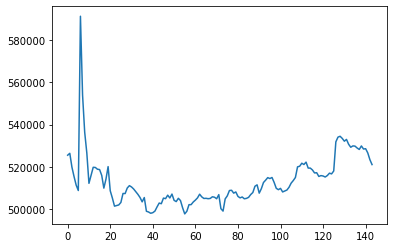

In [7]:
# Look at blank for confirmation
plt.plot(factored1_df[factored1_df["ID"] == "B"].iloc[:,3:].values.tolist()[0])

In [8]:
# Swapping
# if panel == "1":
#         l[2] = l[136]
#         # l[10] = l[138]
#         l[44] = l[140]
#         l[3] = l[137]
#         # l[11] = l[139]
#         l[45] = l[141]
#         del l[136:]
columns_1 = list(factored1_df.columns)
# + 3 to all the indices
columns_1[5] = columns_1[139]
columns_1[13] = columns_1[141]
columns_1[47] = columns_1[143]
columns_1[6] = columns_1[140]
columns_1[14] = columns_1[142]
columns_1[48] = columns_1[144]
del columns_1[139:]

refactored1_df = factored1_df.reindex(columns=columns_1)

    # Delete panel 2 empty
    # if panel == "2":
    #     print(l[28], l[26], l[25], l[29])
    #     # Swap
    #     l[28], l[26] = l[26], l[28]
    #     l[25], l[29] = l[29], l[25]
    #     print(l[28], l[26], l[25], l[29])
    #     # Delete 36 and 37
    #     del l[36:38]
    #     # Delete 40 to 49
    #     del l[38:46]
    
columns_2 = list(factored2_df.columns)
# + 3 to all indices
columns_2[31], columns_2[29] = columns_2[29], columns_2[31]
columns_2[28], columns_2[32] = columns_2[32], columns_2[28]
del columns_2[39:41]
del columns_2[41:49]

refactored2_df = factored2_df.reindex(columns=columns_2)

In [ ]:
list(refactored2_df.columns)

In [11]:
# Save panels
refactored1_df.to_csv("First Stage Combine/" + batch_directory + "/1-edge-combine.csv", index=False)
refactored2_df.to_csv("First Stage Combine/" + batch_directory + "/2-edge-combine.csv", index=False)

## Save each panel's CSV separately, and do the normalisation separately

In [12]:
# For panel 1
panel1 = pd.DataFrame.from_records(batch1)

# Add batch date
panel1.insert(0, "Batch", batch_directory)
# Add panel number
panel1.insert(0, "Panel", 1)
# Add ID
panel1.insert(0, "ID", id1)

panel1

,ID,Panel,Batch,0,1,2,3,4,5,6,...,126,127,128,129,130,131,132,133,134,135
0,461,1,150322,530923.5,513407.0,508871.5,505303.0,505236.0,505153.5,654847.5,...,523356.5,514220.5,511680.5,507408.5,504324.0,501360.5,498560.5,496907.5,497274.0,495866.5
1,474,1,150322,179284.5,157042.0,151666.5,144804.5,143689.5,142241.0,316628.0,...,166337.5,158946.5,153175.5,153779.0,147096.5,135469.0,143354.5,145183.5,147603.0,139676.5
2,519,1,150322,176424.5,160759.5,152287.5,149564.5,147872.5,150609.5,287304.5,...,172608.0,165631.0,160637.0,157389.0,152462.0,150145.0,145291.0,143942.0,141162.5,139681.5
3,520,1,150322,217301.5,205797.0,197379.5,193822.0,192426.0,180531.5,300361.5,...,198524.5,186262.5,189205.5,189485.0,186153.0,182161.5,182719.0,182446.5,180942.0,178218.5
4,523,1,150322,195243.5,184312.5,178132.0,173211.5,170065.5,169990.0,300663.0,...,193178.0,187370.0,184415.0,183042.5,181581.5,182493.0,178458.5,176712.5,173433.0,170200.0
5,528,1,150322,177682.0,165670.0,147596.0,152594.5,150701.0,150184.0,228681.5,...,177445.0,160499.5,165873.5,163768.0,161267.0,161166.0,157388.5,154534.0,148339.5,143734.0
6,539,1,150322,202038.5,176728.0,162638.0,157838.5,154613.5,152968.0,304100.5,...,187766.0,180846.0,173332.0,170307.0,164992.5,156481.5,156846.0,155904.0,155577.5,152623.5
7,545,1,150322,190682.0,173589.0,168983.5,160598.0,162743.0,159198.0,324877.0,...,185122.0,164976.5,174027.0,172158.0,169729.5,168208.5,162604.0,159387.5,158764.5,156077.5
8,555,1,150322,229316.5,213687.0,205186.5,202043.0,199922.5,195158.5,325924.5,...,220113.0,213526.0,207646.0,197017.5,205036.5,195123.5,201559.0,192433.0,199972.0,192643.0
9,573,1,150322,193862.0,184842.5,177865.5,171843.0,167563.5,168132.5,319797.5,...,198147.0,191052.5,186837.5,180149.5,179426.5,178143.0,173155.5,168734.5,168857.0,165467.0


In [14]:
# For panel 2
panel2 = pd.DataFrame.from_records(batch2)
# Add batch date
panel2.insert(0, "Batch", batch_directory)
# Add panel number
panel2.insert(0, "Panel", 2)
# Add ID
panel2.insert(0, "ID", id2)

panel2

,ID,Panel,Batch,0,1,2,3,4,5,6,...,124,125,126,127,128,129,130,131,132,133
0,461,2,150322,200495.5,190717.0,182291.5,177651.5,177739.0,178930.0,267903.5,...,193048.5,217580.0,200032.0,171050.5,174652.0,223302.5,214889.5,235287.5,189944.0,274035.5
1,474,2,150322,404044.5,389587.0,383353.0,380416.5,377386.0,375228.5,462464.0,...,371827.0,379453.0,370888.5,364031.0,367068.5,389542.5,389457.0,384486.5,386259.5,385709.5
2,519,2,150322,481612.5,454928.0,462192.5,456845.5,456287.5,456899.5,575457.5,...,452191.0,455090.0,455173.0,454658.0,454719.5,476227.0,503398.5,466855.5,470298.5,472664.5
3,520,2,150322,525406.5,510791.0,504471.5,498657.5,498640.5,494561.5,605365.0,...,496568.0,501222.5,495728.0,491904.5,492158.0,508698.5,518581.0,495507.0,496871.5,503469.0
4,523,2,150322,191955.0,175794.0,171828.5,166487.0,163933.5,163543.5,274178.5,...,163017.5,163682.5,160649.5,159561.5,161181.0,172762.0,202049.5,171929.5,167449.0,175037.5
5,528,2,150322,188050.0,180872.0,171905.0,166896.0,167516.0,165562.0,276858.0,...,164904.5,156098.0,164500.0,160976.0,159104.0,164131.0,186194.0,162779.5,167178.0,167663.0
6,539,2,150322,207303.0,168316.0,159263.0,155215.5,150425.5,147771.0,290045.5,...,154602.0,154945.5,149758.5,149053.5,146181.0,155595.5,187244.5,151087.5,158229.0,166636.5
7,545,2,150322,158739.5,139051.0,143066.0,139726.0,136819.5,137884.5,222658.0,...,133097.5,135131.0,134238.5,134347.5,136380.5,143442.0,174974.0,146173.0,148749.0,157395.5
8,555,2,150322,199594.0,185056.5,178761.0,172454.5,170013.0,170382.0,276749.5,...,175488.5,180013.5,174681.0,160522.0,168077.0,180574.5,208253.5,177759.0,181279.5,187825.0
9,573,2,150322,200246.5,187921.5,182422.5,177790.5,176535.0,171485.0,272695.0,...,172237.5,172528.0,176225.5,174084.0,173020.0,180515.0,221358.0,182729.0,194101.0,193799.5


## Save the combined file to First Stage Combine folder

In [15]:
# Make new directory if it doesnt exist
from pathlib import Path
Path("First Stage Combine/" + batch_directory).mkdir(parents=True, exist_ok=True)

# Save panels
panel1.to_csv("First Stage Combine/" + batch_directory + "/1-combine.csv", index=False)
panel2.to_csv("First Stage Combine/" + batch_directory + "/2-combine.csv", index=False)

Now we do the normalisation in R